# **1. Let's begin by installing and importing the required libraries.**

In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\numpy\.libs\libopenblas.pyqhxlvvq7vesdpuvuadxevjobghjpay.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
from PIL import Image
from pathlib import Path
import pandas as pd
import math
import cv2
from scipy import signal

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,Flatten,Activation
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import plot_model
import seaborn as sns

# **2. Preparing the Folds Geometry Dataset**


## **2.1 Shape of the hinges dataset**

The **Shape of the hinges dataset**, which consists of three fold types (3 classes). 3243 training images (1081 per class), 68 test images and 300 validation images(100 per class). All images are set to a target size of 224 X 224 X 3. The images were tested as color images and grey scale  images.

In [4]:
print(os.listdir('.'))

['.ipynb_checkpoints', '.jovianrc', '06032021.ipynb', '28022021.ipynb', 'Acadimic_Writting', 'After_Clare', 'assisment_1.ipynb', 'augmentation.txt', 'boxchevronrounded.svg', 'DeepLearning_Paper', 'desktop.ini', 'Draft_fold_deep_learning_ResNet101_projec_all222.ipynb', 'Draft_fold_deep_learning_ResNet152_projec_all.ipynb', 'Draft_fold_deep_learning_ResNet152_projec_all222.ipynb', 'Draft_fold_deep_learning_ResNet34_projec_all222.ipynb', 'Draft_fold_deep_learning_ResNet50_projec_all222.ipynb', 'EUG_conference', 'fold', 'Foldtool_sequentional_RGB_batchbormalization_08032021_acc68_.ipynb', 'Foldtool_sequentional_RGB_final_2602201 (1).ipynb', 'Foldtool_sequentional_RGB_final_2602201.ipynb', 'fold_deep_learning_project.ipynb', 'fold_deep_learning_ResNet101_pretrained_projec_all.pth', 'fold_deep_learning_ResNet152_pretrained_projec_all.pth', 'fold_deep_learning_ResNet152_project75%.ipynb', 'fold_deep_learning_ResNet152_projec_all.ipynb', 'fold_deep_learning_ResNet152_projec_all.pth', 'fold_dee

In [5]:
# Look into the folds data directory
data_dir = r'C:\Users\r04ra18\Desktop\fold\fdata_aksh'
print(os.listdir(data_dir))

['TEST', 'TRAIN', 'VAL']


In [6]:
classes = os.listdir(data_dir + "/TRAIN")
print(len(classes))
print(classes)

3
['box', 'chevron', 'rounded']


In [7]:
classes = os.listdir(data_dir + "/VAL")
print(len(classes))
print(classes)

3
['box', 'chevron', 'rounded']


In [8]:
classes = os.listdir(data_dir + "/TEST")
print(len(classes))
print(classes)

3
['box', 'chevron', 'rounded']


## **2.2 Inspect the Training, Validation and Testing data**

Let's look inside a couple of folders, one from the training set and another from the test set. As an analytic exploration, I can also verify the number of images for each class in the training set as well as in the test set.

In [9]:
rounded_files = os.listdir(data_dir + "/TRAIN/rounded")
print('No. of training examples for rounded:', len(rounded_files))
print(rounded_files[:10])

No. of training examples for rounded: 1372
['1 (2).png', '1 (3).png', '1 (4).png', '1.png', '10 (2).png', '10 (3).png', '10.png', '11 (2).png', '11 (3).png', '11.png']


In [10]:
chevron_test_files = os.listdir(data_dir + "/TEST/chevron")
print("No. of test examples for chevron:", len(chevron_test_files))
print(chevron_test_files[:5])

No. of test examples for chevron: 22
['01604043.jpg', '1524444.jpg', '6d30b38687cbbaf8f167c2d2886e96d9.jpg', '8887542.jpg', '91_034.jpg']


In [11]:
chevron_test_files = os.listdir(data_dir + "/VAL/box")
print("No. of test examples for chevron:", len(chevron_test_files))
print(chevron_test_files[:5])

No. of test examples for chevron: 1
['1']


In [12]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/fold'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## **2.3 Exploring the numbers of fold images Dataset**

I also loop through the folds types Dataset to determine the number of images belonging to each class as follows:

In [13]:
for cls in classes:
  train_images = os.listdir(data_dir + '/TRAIN/' + cls)
  img_count = len(train_images)
  print("Number of images belonging to {} is {}".format(cls, img_count))

Number of images belonging to box is 1224
Number of images belonging to chevron is 1317
Number of images belonging to rounded is 1372


In [14]:
for cls in classes:
  train_images = os.listdir(data_dir + '/VAL/' + cls)
  img_count = len(train_images)
  print("Number of images belonging to {} is {}".format(cls, img_count))

Number of images belonging to box is 1
Number of images belonging to chevron is 1
Number of images belonging to rounded is 1


In [15]:
for cls in classes:
  train_images = os.listdir(data_dir + '/TEST/' + cls)
  img_count = len(train_images)
  print("Number of images belonging to {} is {}".format(cls, img_count))

Number of images belonging to box is 22
Number of images belonging to chevron is 22
Number of images belonging to rounded is 24


## **2.4 Dataset Directory Assignment**

In [16]:
data_dir = r'C:\Users\r04ra18\Desktop\fold\fdata_aksh'
train_directory= data_dir + '/TRAIN'
test_directory= data_dir + '/TEST'
val_directory= data_dir + '/VAL'

# **3. Images Pre-processing**

## **3.1 Image Rescaling**

In [17]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

## **3.2 Image Reading Using the flow from directory function**

In [18]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                  batch_size=256,
                                                 class_mode='sparse')
val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 batch_size=256,
                                                 color_mode='rgb',
                                                 class_mode='sparse')
test_generator=test_datagen.flow_from_directory(test_directory,
                                                batch_size=256,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse')

Found 3913 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 68 images belonging to 3 classes.


## **3.3 Building Dictionary of folds types Classes**

In [19]:
num_classes=(len(train_generator.class_indices))
print(num_classes)

3


In [20]:
train_generator.class_indices

{'box': 0, 'chevron': 1, 'rounded': 2}

In [21]:
num_classes=(len(val_generator.class_indices))
print(num_classes)

3


In [22]:
val_generator.class_indices

{'box': 0, 'chevron': 1, 'rounded': 2}

In [23]:
num_classes=(len(test_generator.class_indices))
print(num_classes)

3


In [24]:
test_generator.class_indices

{'box': 0, 'chevron': 1, 'rounded': 2}

## **3.4 Data Insight Through Plotting Distribution Graphs**

### **3.4.1 Training dataset**

In [25]:
folds=list(train_generator.class_indices.keys())

In [26]:
x=list(train_generator.classes)

In [27]:
label=[]
for i in range (0, num_classes):
    label.append(x.count(i))

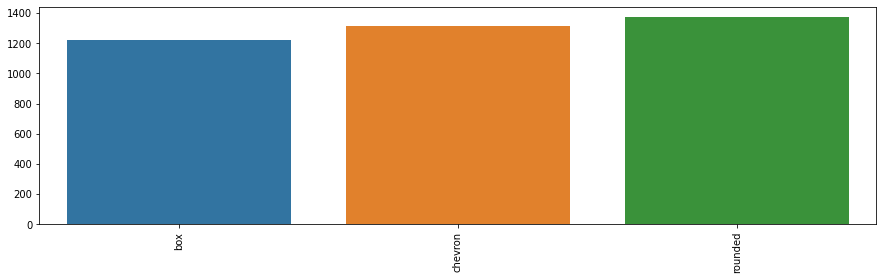

In [28]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=folds[:60],y=label[:60])
plt.xticks(rotation=90)
plt.show()

### **3.4.2 Validation dataset**

In [29]:
folds=list(val_generator.class_indices.keys())

In [30]:
x=list(val_generator.classes)

In [31]:
label=[]
for i in range (0, num_classes):
    label.append(x.count(i))

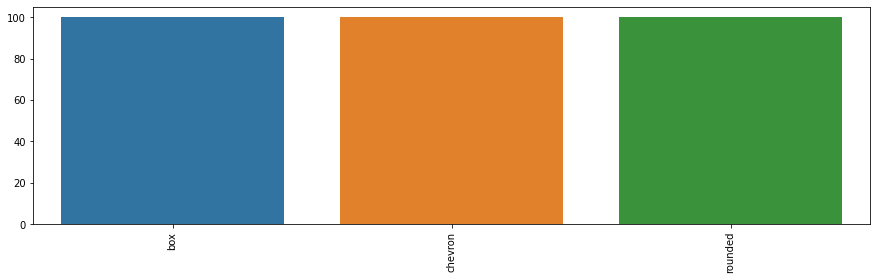

In [32]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=folds[:60],y=label[:60])
plt.xticks(rotation=90)
plt.show()

### **3.4.3 Testing dataset**

In [33]:
folds=list(test_generator.class_indices.keys())

In [34]:
x=list(test_generator.classes)

In [35]:
label=[]
for i in range (0, num_classes):
    label.append(x.count(i))

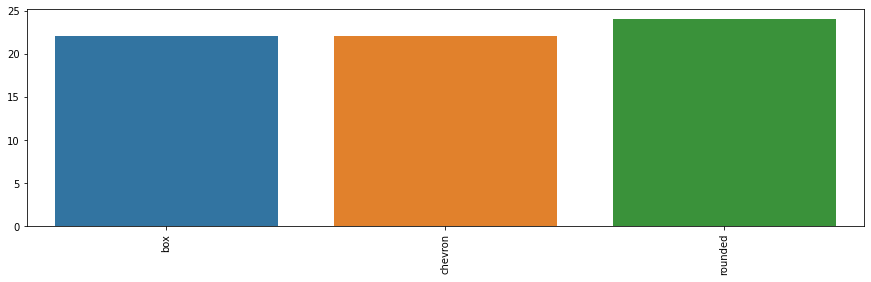

In [36]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=folds[0:10],y=label[0:10])
plt.xticks(rotation=90)
plt.show()

## **3.5 Examples of folding dataset**

### **3.5.1 Training dataset**

**Class 1 -Chevron fold**

In [37]:
# image1 = np.array(Image.open('/content/drive/MyDrive/fold/TRAIN/chevron/26 (2).PNG'))
# plt.imshow(image1, cmap='gray')

**Class 2 - Box fold**

In [38]:
# image1 = np.array(Image.open('/content/drive/MyDrive/fold/TRAIN/box/g1299.png'))
# plt.imshow(image1, cmap='gray')

**Class 3 - Rounded fold**

In [39]:
# image3 = np.array(Image.open('/content/drive/MyDrive/fold/TRAIN/rounded/2 (6).png'))
# plt.imshow(image3, cmap='gray')

# **4. Data Augmentations and Normalization**

In [40]:
image_size = 32 # 32

In [41]:
import PIL.Image

In [42]:
# Data transforms (normalization & data augmentation) # tt.RandomCrop(64, padding=4, padding_mode='reflect')
stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
randomrotate = 10 # 0.175 rad
train_tfms = tt.Compose([tt.Resize((image_size, image_size)),
                         tt.RandomCrop(image_size, padding=4, padding_mode='reflect'),
                         tt.Resize(image_size),
                         tt.CenterCrop(image_size), 
                         tt.RandomHorizontalFlip(),
                         tt.RandomVerticalFlip(), 
                         tt.Pad((2, 5, 0, 5)),
                         #tt.RandomRotation(randomrotate),
                         tt.RandomAffine(0, translate=(0.4, 0.5)),
                         tt.RandomRotation(randomrotate, resample=PIL.Image.NEAREST, expand=False, center=(40, 80), fill=100), ##
                         #tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1), ##
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.Resize((image_size, image_size)), tt.ToTensor(), tt.Normalize(*stats)])

test_tfms = tt.Compose([tt.Resize((image_size, image_size)), tt.ToTensor(), tt.Normalize(*stats)])

In [43]:
# PyTorch Training & Validation & Test Datasets
train_ds = ImageFolder(data_dir+'/TRAIN', train_tfms)
valid_ds = ImageFolder(data_dir+'/VAL', valid_tfms)
test_ds = ImageFolder(data_dir+'/TEST', test_tfms)

# **5. Data Loader**

Next, we can create data loaders for retrieving images in batches. I will use a relatively large batch size of 400 or 256 to utlize a larger portion of the GPU RAM. The, I try reducing the batch size & restarting the kernel if I face an "out of memory" error.

In [44]:
batch_size = 400 # 256

In [45]:
# PyTorch Training & Validation & Test Data Loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, num_workers=3, pin_memory=True)

Let's take a look at some sample images from the training dataloader. To display the images, I need to denormalize the pixels values to bring them back into the range (0,1).

In [46]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

In [47]:
# show_batch(train_dl)

In [48]:
# show_batch(valid_dl)

C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


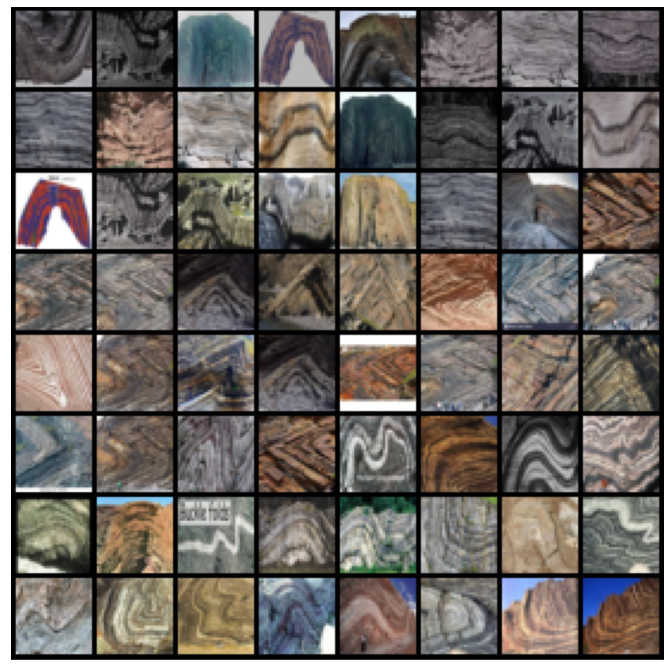

In [49]:
show_batch(test_dl)

The colors seem out of place because of the normalization. Note that normalization is also applied during inference. When looking closely, I can spot the cropping and reflection padding in some of the images. Horizontal flip is a bit difficult to detect from visual inspection.

In [50]:
# !pip install jovian --upgrade -q
# import jovian
# jovian.set_project('fold-deep-learning-resnet152-projec-all')
# jovian.set_colab_id('13ioHD681lSaJm8KvyoRVMsHVjhoJtsRt')
# jovian.commit(project=project_name, environment=None)

# **6. Modelling**

## **6.1 Utilizing GPU**

To seamlessly use a GPU, if one is available, I define a couple of helper functions (`get_default_device` & `to_device`) besides a helper class `DeviceDataLoader` to move my model & data to the GPU as required. 

In [51]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where this notebook is being run on the cloud, the default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [52]:
device = get_default_device()
device

device(type='cpu')

I wrap my training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available).

In [53]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

# **7. Model Training**

# **7.1 Modifying a Pretrained Model (ResNet34)**

In [54]:
import torch.nn as nn
import torch.nn.functional as F

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}],{} train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, "last_lr: {:.5f},".format(result['lrs'][-1]) if 'lrs' in result else '', 
            result['train_loss'], result['val_loss'], result['val_acc']))

In [55]:
from torchvision import models

class FoldsModel(ImageClassificationBase):
    def __init__(self, num_classes, pretrained=True):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=pretrained)
        # Replace last layer
        self.network.fc = nn.Sequential(nn.Linear(self.network.fc.in_features, num_classes))

    def forward(self, xb):
        return self.network(xb)

In [56]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [57]:
import torch
from tqdm.notebook import tqdm

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [58]:
device = get_default_device()
device

device(type='cpu')

## **7.3.2 Finetuning the Pretrained Model**

In [59]:
model = FoldsModel(len(train_ds.classes), pretrained=True)
to_device(model, device);

Before I begin training, I evaluate the instantiated model in order to see how it performs on the validation set with the initial set of parameters.

In [60]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 1.3735870122909546, 'val_acc': 0.3233333230018616}]

In [61]:
epochs = 80 #80gd got70, 
max_lr = 0.003  #a 0.01gd got70, 0.001 got 76, 0.0001 got 71, 0.003 got 77, 0.004 got 76, 0.002 got 75, 0.006 got 73, 0.002 got 76, 0.0009 got 73
grad_clip = 0.1  # 0.1 
weight_decay = 1e-4  # 1e-4gd ot70, 76 
opt_func = torch.optim.Adam  # torch.optim.SGD

In [62]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [0],last_lr: 0.00013, train_loss: 0.9502, val_loss: 1.2793, val_acc: 0.4000


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1],last_lr: 0.00016, train_loss: 0.7257, val_loss: 1.1782, val_acc: 0.3167


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [2],last_lr: 0.00022, train_loss: 0.6476, val_loss: 1.2765, val_acc: 0.3500


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [3],last_lr: 0.00031, train_loss: 0.5956, val_loss: 1.2452, val_acc: 0.3700


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [4],last_lr: 0.00041, train_loss: 0.5718, val_loss: 1.2448, val_acc: 0.3867


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [5],last_lr: 0.00053, train_loss: 0.5469, val_loss: 1.1837, val_acc: 0.4333


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [6],last_lr: 0.00067, train_loss: 0.5145, val_loss: 1.1609, val_acc: 0.4133


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [7],last_lr: 0.00083, train_loss: 0.5073, val_loss: 1.0730, val_acc: 0.4233


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [8],last_lr: 0.00100, train_loss: 0.4897, val_loss: 1.2775, val_acc: 0.4500


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [9],last_lr: 0.00118, train_loss: 0.4762, val_loss: 1.1398, val_acc: 0.4667


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [10],last_lr: 0.00136, train_loss: 0.4901, val_loss: 1.0621, val_acc: 0.4500


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [11],last_lr: 0.00155, train_loss: 0.4781, val_loss: 1.0066, val_acc: 0.5100


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [12],last_lr: 0.00174, train_loss: 0.4675, val_loss: 1.1453, val_acc: 0.4567


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [13],last_lr: 0.00193, train_loss: 0.4942, val_loss: 1.1898, val_acc: 0.4400


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [14],last_lr: 0.00210, train_loss: 0.4772, val_loss: 1.2272, val_acc: 0.4633


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [15],last_lr: 0.00227, train_loss: 0.4995, val_loss: 1.1060, val_acc: 0.4533


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [16],last_lr: 0.00243, train_loss: 0.4804, val_loss: 1.1827, val_acc: 0.4733


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [17],last_lr: 0.00257, train_loss: 0.5002, val_loss: 1.1517, val_acc: 0.4533


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [18],last_lr: 0.00270, train_loss: 0.4822, val_loss: 1.1895, val_acc: 0.4633


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [19],last_lr: 0.00281, train_loss: 0.4732, val_loss: 1.1739, val_acc: 0.4600


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [20],last_lr: 0.00289, train_loss: 0.4771, val_loss: 1.2257, val_acc: 0.4700


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [21],last_lr: 0.00295, train_loss: 0.4638, val_loss: 1.6682, val_acc: 0.3800


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [22],last_lr: 0.00299, train_loss: 0.4775, val_loss: 1.2311, val_acc: 0.4833


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [23],last_lr: 0.00300, train_loss: 0.4602, val_loss: 1.5345, val_acc: 0.4267


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [24],last_lr: 0.00300, train_loss: 0.4494, val_loss: 1.2926, val_acc: 0.4733


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [25],last_lr: 0.00299, train_loss: 0.4439, val_loss: 1.3747, val_acc: 0.4700


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [26],last_lr: 0.00298, train_loss: 0.4462, val_loss: 1.3297, val_acc: 0.4400


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [27],last_lr: 0.00296, train_loss: 0.4357, val_loss: 1.3836, val_acc: 0.4567


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [28],last_lr: 0.00294, train_loss: 0.4314, val_loss: 1.3224, val_acc: 0.4567


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [29],last_lr: 0.00292, train_loss: 0.4191, val_loss: 1.2959, val_acc: 0.4800


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [30],last_lr: 0.00289, train_loss: 0.4321, val_loss: 1.3832, val_acc: 0.4533


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [31],last_lr: 0.00285, train_loss: 0.4145, val_loss: 1.1484, val_acc: 0.5267


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [32],last_lr: 0.00281, train_loss: 0.4121, val_loss: 1.3356, val_acc: 0.5100


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [33],last_lr: 0.00277, train_loss: 0.4258, val_loss: 1.4745, val_acc: 0.5367


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [34],last_lr: 0.00272, train_loss: 0.4081, val_loss: 1.3697, val_acc: 0.4800


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [35],last_lr: 0.00267, train_loss: 0.3867, val_loss: 1.2617, val_acc: 0.4900


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [36],last_lr: 0.00262, train_loss: 0.4020, val_loss: 1.3983, val_acc: 0.4800


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [37],last_lr: 0.00256, train_loss: 0.4195, val_loss: 1.3607, val_acc: 0.4467


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [38],last_lr: 0.00250, train_loss: 0.4132, val_loss: 1.2341, val_acc: 0.5067


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [39],last_lr: 0.00244, train_loss: 0.3973, val_loss: 1.4211, val_acc: 0.4700


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [40],last_lr: 0.00237, train_loss: 0.3935, val_loss: 1.2656, val_acc: 0.5167


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [41],last_lr: 0.00230, train_loss: 0.3766, val_loss: 1.3262, val_acc: 0.5000


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [42],last_lr: 0.00223, train_loss: 0.3910, val_loss: 1.2568, val_acc: 0.5300


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [43],last_lr: 0.00215, train_loss: 0.3816, val_loss: 1.1333, val_acc: 0.5133


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [44],last_lr: 0.00207, train_loss: 0.3525, val_loss: 1.2262, val_acc: 0.5233


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [45],last_lr: 0.00200, train_loss: 0.3609, val_loss: 1.2367, val_acc: 0.5400


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [46],last_lr: 0.00192, train_loss: 0.3897, val_loss: 1.2483, val_acc: 0.5133


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [47],last_lr: 0.00183, train_loss: 0.3538, val_loss: 1.2754, val_acc: 0.5100


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [48],last_lr: 0.00175, train_loss: 0.3686, val_loss: 1.2845, val_acc: 0.5100


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [49],last_lr: 0.00167, train_loss: 0.3629, val_loss: 1.1787, val_acc: 0.5467


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [50],last_lr: 0.00158, train_loss: 0.3510, val_loss: 1.2530, val_acc: 0.5367


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [51],last_lr: 0.00150, train_loss: 0.3378, val_loss: 1.1428, val_acc: 0.5700


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [52],last_lr: 0.00142, train_loss: 0.3511, val_loss: 1.2575, val_acc: 0.5100


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [53],last_lr: 0.00133, train_loss: 0.3413, val_loss: 1.2587, val_acc: 0.5133


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [54],last_lr: 0.00125, train_loss: 0.3390, val_loss: 1.3221, val_acc: 0.5100


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [55],last_lr: 0.00117, train_loss: 0.3417, val_loss: 1.4378, val_acc: 0.5233


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [56],last_lr: 0.00108, train_loss: 0.3311, val_loss: 1.2757, val_acc: 0.5467


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [57],last_lr: 0.00100, train_loss: 0.3231, val_loss: 1.1578, val_acc: 0.5767


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [58],last_lr: 0.00093, train_loss: 0.3259, val_loss: 1.1628, val_acc: 0.5667


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [59],last_lr: 0.00085, train_loss: 0.3139, val_loss: 1.1393, val_acc: 0.5967


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [60],last_lr: 0.00077, train_loss: 0.2941, val_loss: 1.2272, val_acc: 0.5767


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [61],last_lr: 0.00070, train_loss: 0.3079, val_loss: 1.1783, val_acc: 0.5633


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [62],last_lr: 0.00063, train_loss: 0.3064, val_loss: 1.1148, val_acc: 0.5533


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [63],last_lr: 0.00056, train_loss: 0.2933, val_loss: 1.2479, val_acc: 0.5867


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [64],last_lr: 0.00050, train_loss: 0.2964, val_loss: 1.2505, val_acc: 0.6000


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [65],last_lr: 0.00044, train_loss: 0.2916, val_loss: 1.1720, val_acc: 0.5800


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [66],last_lr: 0.00038, train_loss: 0.2942, val_loss: 1.1971, val_acc: 0.6000


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [67],last_lr: 0.00033, train_loss: 0.2879, val_loss: 1.2245, val_acc: 0.6000


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [68],last_lr: 0.00028, train_loss: 0.2829, val_loss: 1.1662, val_acc: 0.6133


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [69],last_lr: 0.00023, train_loss: 0.2847, val_loss: 1.1603, val_acc: 0.6000


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [70],last_lr: 0.00019, train_loss: 0.2795, val_loss: 1.1742, val_acc: 0.6000


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [71],last_lr: 0.00015, train_loss: 0.2738, val_loss: 1.1763, val_acc: 0.5900


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [72],last_lr: 0.00011, train_loss: 0.2801, val_loss: 1.1834, val_acc: 0.5933


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [73],last_lr: 0.00008, train_loss: 0.2712, val_loss: 1.1850, val_acc: 0.5967


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [74],last_lr: 0.00006, train_loss: 0.2746, val_loss: 1.1909, val_acc: 0.6033


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [75],last_lr: 0.00004, train_loss: 0.2695, val_loss: 1.1804, val_acc: 0.6033


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [76],last_lr: 0.00002, train_loss: 0.2747, val_loss: 1.1755, val_acc: 0.6067


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [77],last_lr: 0.00001, train_loss: 0.2725, val_loss: 1.1785, val_acc: 0.6033


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [78],last_lr: 0.00000, train_loss: 0.2648, val_loss: 1.1801, val_acc: 0.6033


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [79],last_lr: 0.00000, train_loss: 0.2743, val_loss: 1.1780, val_acc: 0.6033
Wall time: 2h 40min 32s


In [63]:
from matplotlib import spines
from matplotlib import axes

In [64]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
# plt.style.use('dark_background')
# matplotlib.spines[axis].set_color(color) 
# matplotlib.spines["bottom"].set_color("red")
# matplotlib.spines["left"].set_color("orange")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('red')
ax.spines['left'].set_color('red')
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'})

In [65]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-bx')
    plt.xlabel('epoch', color='C0')
    plt.ylabel('accuracy', color='C0')
    plt.title('Accuracy vs. No. of epochs', color='C0');

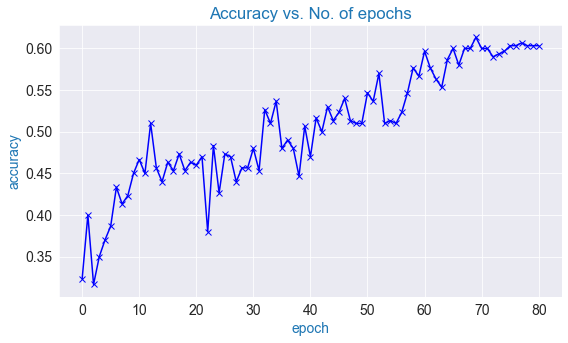

In [66]:
plot_accuracies(history)

We also plot the Model Training and Validation Losses to investigate the training trend further down the improvement path.

In [67]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch', color='C0')
    plt.ylabel('loss', color='C0')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs', color='C0');

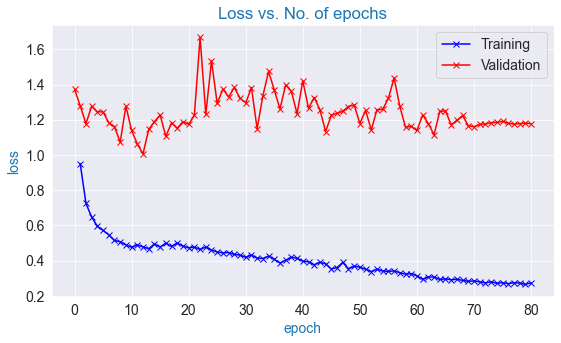

In [68]:
plot_losses(history)

In [69]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs, 'C24-') # C11-
    plt.xlabel('Batch No.', color='C0')
    plt.ylabel('One Cycle Learning Rate Scheduler', color='C0')
    plt.title('One Cycle Learning Rate Scheduler vs. Batch No.', color='C0');

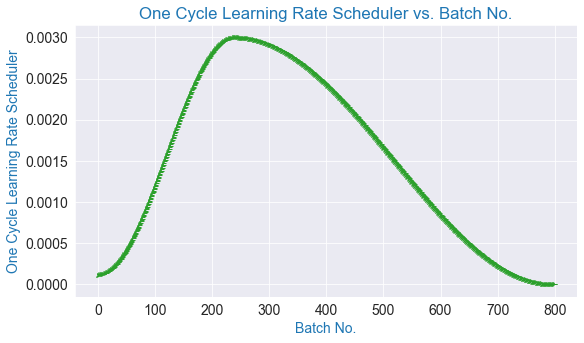

In [70]:
plot_lrs(history)

In [71]:
evaluate(model, test_dl)

{'val_loss': 0.9325282573699951, 'val_acc': 0.6323529481887817}

In [72]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

def denormalize(images, means, stds):
    if len(images.shape) == 3:
        images = images.unsqueeze(0)
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_image(img_tensor, label):
    print('Label:', test_ds.classes[label], '(' + str(label) + ')')
    img_tensor = denormalize(img_tensor, *imagenet_stats)[0].permute((1, 2, 0))
    plt.imshow(img_tensor)

In [73]:
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

Label: chevron (1)


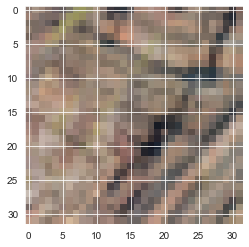

In [74]:
show_image(*test_ds[38])

In [75]:
def predict_image(img, model3):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: rounded , Predicted: box


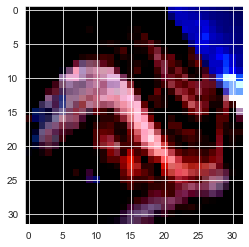

In [76]:
# Image Test#3 (With Clamping)
img, label = test_ds[60]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: chevron (1)


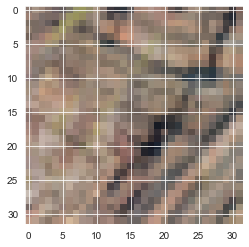

In [77]:
show_image(*test_ds[38])

Label: chevron , Predicted: chevron


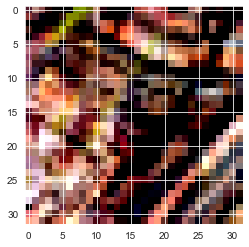

In [78]:
# Image Test#2 (With Clamping)
img, label = test_ds[38]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

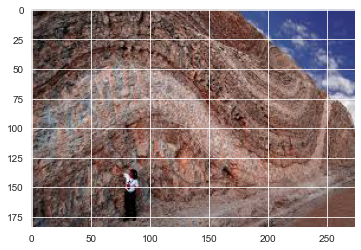

In [79]:
image2 = np.array(Image.open(r'C:\Users\r04ra18\Desktop\fold\fdata_aksh\TEST\rounded\images (61).jpg'))
plt.imshow(image2, cmap='GnBu_r')

Label: chevron , Predicted: chevron


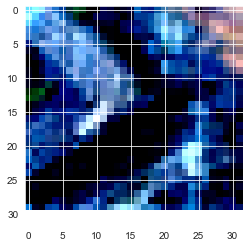

In [80]:
# Image Test#2 (With Clamping)
img, label = test_ds[40]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: box , Predicted: box


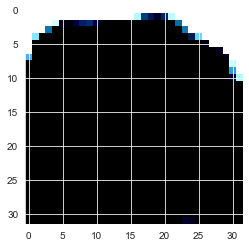

In [81]:
# Image Test#3 (With Clamping)
img, label = test_ds[12]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: box , Predicted: rounded


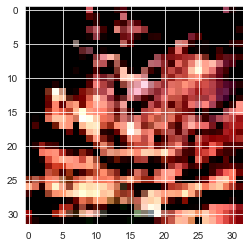

In [82]:
# Image Test#4 (Withour Clamping)
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
img, label = test_ds[9]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

In [83]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: box , Predicted: chevron


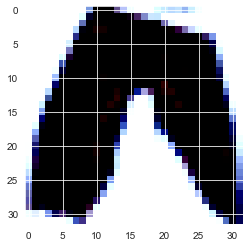

In [84]:
# Image Test#5 (Withour Clamping)
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
img, label = test_ds[3]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

In [85]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 1.1779570579528809, 'val_acc': 0.6033333539962769}]

In [86]:
history = [evaluate(model, test_dl)]
history

[{'val_loss': 0.9325282573699951, 'val_acc': 0.6323529481887817}]

In [87]:
torch.save(model.state_dict(), 'fold_deep_learning_ResNet32_projec_all.pth')

In [88]:
model.state_dict()

OrderedDict([('network.conv1.weight',
              tensor([[[[-3.9072e-02, -2.2216e-02,  8.3266e-05,  ...,  7.3415e-02,
                          5.4544e-02,  4.0882e-02],
                        [ 3.1275e-02,  1.8232e-02,  3.2574e-02,  ...,  6.3095e-02,
                          6.5852e-02,  7.1979e-02],
                        [ 1.9573e-02, -3.1683e-02, -8.0236e-02,  ..., -7.5614e-02,
                         -7.1158e-02, -8.4926e-02],
                        ...,
                        [-2.1382e-02, -1.7703e-02, -1.4278e-02,  ...,  3.5374e-02,
                          3.4972e-02,  3.4249e-02],
                        [ 2.9218e-03,  2.1819e-02,  2.6944e-02,  ...,  1.0470e-01,
                          6.8399e-02,  5.8495e-02],
                        [-6.3610e-03,  4.6248e-03,  8.0835e-03,  ...,  5.2046e-02,
                          3.8116e-02,  7.2841e-02]],
              
                       [[-3.1122e-02, -2.9862e-02, -7.9552e-03,  ...,  6.7318e-02,
                        

In [89]:
model_load = to_device(FoldsModel(3, 3), device)

In [90]:
model_load.state_dict()

OrderedDict([('network.conv1.weight',
              tensor([[[[ 5.4109e-03, -6.9092e-03,  7.8839e-03,  ...,  4.9072e-02,
                          3.0660e-02,  2.5398e-02],
                        [ 4.1081e-02,  3.1296e-02,  3.2265e-02,  ...,  3.3145e-02,
                          2.9754e-02,  4.1735e-02],
                        [ 4.9519e-03, -3.1705e-02, -6.1310e-02,  ..., -9.7493e-02,
                         -1.1601e-01, -1.2191e-01],
                        ...,
                        [-1.2287e-02, -2.4841e-02, -9.3052e-03,  ...,  1.7113e-02,
                          2.4631e-03,  1.6726e-02],
                        [ 3.9117e-03,  4.4537e-03,  3.6315e-02,  ...,  1.0371e-01,
                          7.3973e-02,  5.9085e-02],
                        [ 1.6784e-02,  8.8902e-03,  3.1312e-02,  ...,  9.6964e-02,
                          8.3749e-02,  9.6970e-02]],
              
                       [[-7.7192e-03, -8.7711e-03,  1.4143e-02,  ...,  3.3901e-02,
                        

In [91]:
model_load.load_state_dict(torch.load('fold_deep_learning_ResNet32_projec_all.pth'))

<All keys matched successfully>

Just as a sanity check, I also verify that this newly loaded model has the same loss and accuracy on the test set as before.

In [92]:
evaluate(model_load, valid_dl)

{'val_loss': 1.1779570579528809, 'val_acc': 0.6033333539962769}

In [93]:
evaluate(model_load, test_dl)

{'val_loss': 0.9325282573699951, 'val_acc': 0.6323529481887817}

In [94]:
data_loader = torch.utils.data.DataLoader(
     train_ds, batch_size=3)

In [95]:
batch = next(iter(data_loader))
images, labels = batch

In [96]:
images.shape

torch.Size([3, 3, 42, 34])

In [97]:
labels.shape

torch.Size([3])

In [98]:
preds = model(images)
preds

tensor([[ 0.6422,  0.3889, -0.8763],
        [ 1.4578, -3.0226,  1.6250],
        [ 0.8913, -1.1688,  0.3720]], grad_fn=<AddmmBackward>)

In [99]:
preds.shape

torch.Size([3, 3])

In [100]:
preds

tensor([[ 0.6422,  0.3889, -0.8763],
        [ 1.4578, -3.0226,  1.6250],
        [ 0.8913, -1.1688,  0.3720]], grad_fn=<AddmmBackward>)

In [101]:
preds.argmax(dim=1)

tensor([0, 2, 0])

In [102]:
labels

tensor([0, 0, 0])

In [103]:
preds.argmax(dim=1).eq(labels)

tensor([ True, False,  True])

In [104]:
preds.argmax(dim=1).eq(labels).sum()

tensor(2)

In [105]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [106]:
get_num_correct(preds, labels)

2

In [107]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [108]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_ds, batch_size=10000)
    train_preds = get_all_preds(model, prediction_loader)

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from collections import Counter

In [110]:
cm = confusion_matrix(train_ds.targets, train_preds.argmax(dim=1))
print(type(cm))

<class 'numpy.ndarray'>


In [111]:
cm

array([[1108,   40,   76],
       [  50, 1144,  123],
       [  59,  121, 1192]], dtype=int64)

In [112]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [113]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1108   40   76]
 [  50 1144  123]
 [  59  121 1192]]


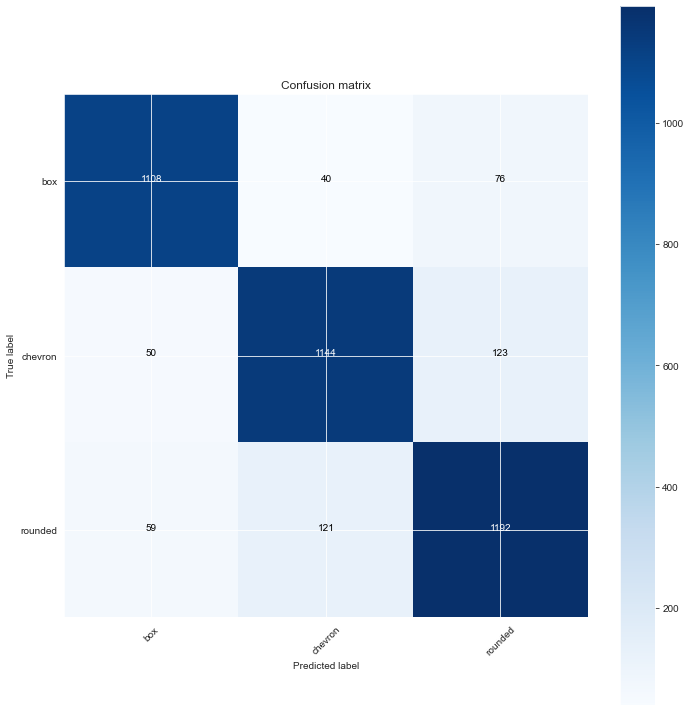

In [114]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, train_ds.classes)

In [115]:
with torch.no_grad():
    prediction_test_ld = torch.utils.data.DataLoader(test_ds, batch_size=10000)
    test_preds = get_all_preds(model, prediction_test_ld)

In [116]:
cm_test = confusion_matrix(test_ds.targets, test_preds.argmax(dim=1))
print(type(cm_test))

<class 'numpy.ndarray'>


Confusion matrix, without normalization
[[ 6  5 11]
 [ 1 21  0]
 [ 4  4 16]]


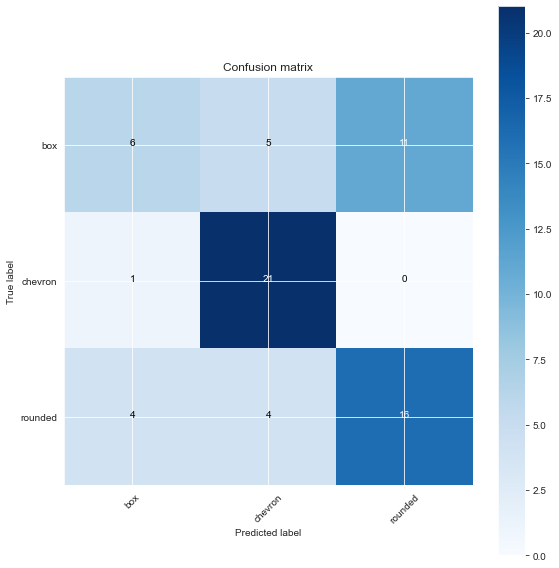

In [117]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_test, test_ds.classes)

In [118]:
with torch.no_grad():
    prediction_val_ld = torch.utils.data.DataLoader(valid_ds, batch_size=10000)
    valid_preds = get_all_preds(model, prediction_val_ld)

In [119]:
cm_valid = confusion_matrix(valid_ds.targets, valid_preds.argmax(dim=1))
print(type(cm_valid))

<class 'numpy.ndarray'>


Confusion matrix, without normalization
[[50 16 34]
 [ 8 71 21]
 [16 24 60]]


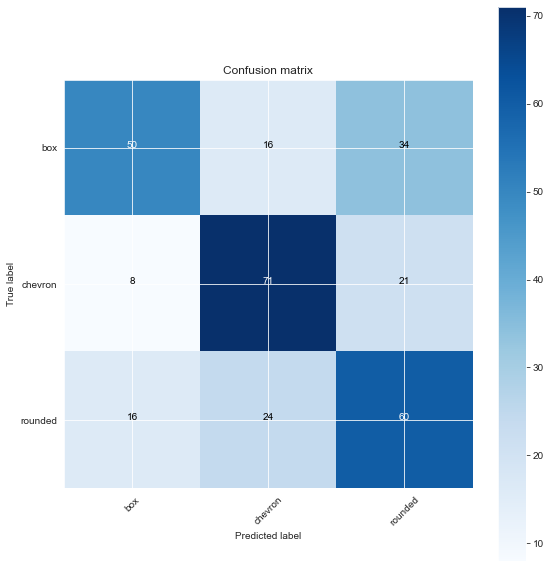

In [120]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_valid, valid_ds.classes)